# Preprocessing file names

In [2]:
# Preprocessing file names for the dataset
import os

def rename_files_in_folder(folder_path, GEN):
    files = os.listdir(folder_path)
    files = [file for file in files if os.path.isfile(os.path.join(folder_path, file))]
    files.sort()
    
    for index, file_name in enumerate(files):
        extension = os.path.splitext(file_name)[1]
        if GEN:
            new_file_name = f"gen{index + 1}{extension}"
        else:
            new_file_name = f"real{index + 1}{extension}"
        
        old_file_path = os.path.join(folder_path, file_name)
        new_file_path = os.path.join(folder_path, new_file_name)
        
        os.rename(old_file_path, new_file_path)

generated_images = "E:\\CS 512 Project\\Proj\\data_image_classification\\generated_images"
real_images = "E:\\CS 512 Project\\Proj\\data_image_classification\\real_images"

In [3]:
rename_files_in_folder(generated_images, True)
rename_files_in_folder(real_images, False)

# Basic model trial

In [1]:
!pip install tensorflow matplotlib
!pip install scipy
!pip install -U scikit-learn

In [2]:
import numpy as np

In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = 'E:/CS 512 Project/Proj/data_image_classification'
train_dir_generated = os.path.join(base_dir, 'generated_images')
train_dir_real = os.path.join(base_dir, 'real_images')

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2 
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # resize images to 150x150
    batch_size=32,
    class_mode='binary', 
    subset='training' 
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)



Found 603 images belonging to 2 classes.
Found 150 images belonging to 2 classes.


In [4]:
train_generator.class_indices

{'generated_images': 0, 'real_images': 1}

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


c:\Users\Manan\anaconda3\envs\proj\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=100, 
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50,
)


Epoch 1/20


c:\Users\Manan\anaconda3\envs\proj\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 19/100 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - accuracy: 0.6354 - loss: 1.2022

c:\Users\Manan\anaconda3\envs\proj\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.6862 - loss: 0.9062 - val_accuracy: 0.7333 - val_loss: 0.5524
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7772 - loss: 0.4834 - val_accuracy: 0.7600 - val_loss: 0.4902
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.8618 - loss: 0.3453 - val_accuracy: 0.7600 - val_loss: 0.9149
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.8747 - loss: 0.3143 - val_accuracy: 0.7867 - val_loss: 0.5843
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.8696 - loss: 0.3243 - val_accuracy: 0.7333 - val_loss: 0.5815
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8226 - loss: 0.3920 - val_accuracy: 0.8133 - val_loss: 0.5111
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8863 - loss: 0.2661 - val_accuracy: 0.8067 - val_loss: 0.5289
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.8905 - loss: 0.2528 - val_accuracy: 0.820

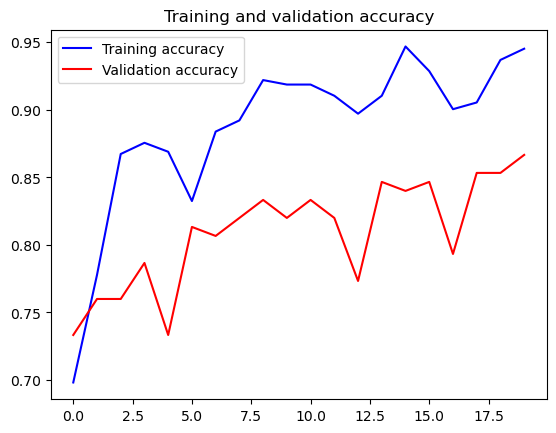

In [7]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()


In [9]:
model.save('E:\\CS 512 Project\\Proj\\basic_cnn_model.keras')

### trial predictions

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('E:\\CS 512 Project\Proj\\basic_cnn_model.keras')

In [16]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def preprocess_image(image_path, target_size=(150, 150)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

new_image_path = 'E:\\CS 512 Project\\8e4b560a-c937-48d5-901c-fc81b581e04b.webp'
processed_image = preprocess_image(new_image_path)

In [23]:
prediction = model.predict(processed_image)

is_real = prediction[0][0] > 0.5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [24]:
if is_real:
    print("The image is predicted to be a real image.")
else:
    print("The image is predicted to be a generated image.")


The image is predicted to be a real image.
